In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import geopandas as gpd
from shapely.geometry import Point

In [2]:
#getting data from the url
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = requests.get(url)
html_content = page.text

In [3]:
#load data into bs4
soup = BeautifulSoup(html_content,'lxml')
table = soup.find("table",{"class":"wikitable sortable"})

In [4]:
#use pandas to read the table
df = pd.read_html(str(table))

In [5]:
df = df[0]

In [6]:
#drop the row which Borough is not assigned
df = df[df.Borough != 'Not assigned']

In [7]:
df.sort_values('Postal Code')

,Postal Code,Borough,Neighborhood
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn
45,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
107,M9P,Etobicoke,Westmount
116,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
143,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [8]:
#reset the column name
df.columns = ['PostalCode','Borough','Neighborhood']

In [9]:
df.loc[df['PostalCode'] == 'M5A']

,PostalCode,Borough,Neighborhood
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [10]:
df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [11]:
#reset the index
df = df.reset_index(drop=True)
df.index = df.index +1 

In [12]:
df

,PostalCode,Borough,Neighborhood
1,M3A,North York,Parkwoods
2,M4A,North York,Victoria Village
3,M5A,Downtown Toronto,"Regent Park, Harbourfront"
4,M6A,North York,"Lawrence Manor, Lawrence Heights"
5,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
99,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
100,M4Y,Downtown Toronto,Church and Wellesley
101,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
102,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [13]:
df.shape

(103, 3)

In [14]:
#read csv file and import to data pandaframe
geocode = 'https://cocl.us/Geospatial_data'
geodata = pd.read_csv(geocode)

In [15]:
geodata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
geocode_data = pd.merge(df,geodata,left_on='PostalCode',right_on='Postal Code').drop('Postal Code',axis = 1)

In [17]:
geocode_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [18]:
#Select only Toronto Neighbourhoods
Toronto_data = geocode_data[geocode_data['Borough'].str.contains('Toronto')]

Toronto_data = Toronto_data.reset_index(drop=True)
Toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


D:\Anaconda\envs\geo-env\lib\site-packages\geopandas\plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


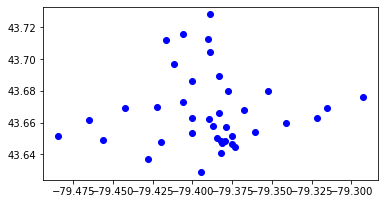

<Figure size 2160x720 with 0 Axes>

In [35]:
#load latitude and longitude into geopandas dataframe
Toronto_data['Coordinates'] = list(zip(Toronto_data.Longitude, Toronto_data.Latitude))
Toronto_data['Coordinates'] = Toronto_data['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(Toronto_data, geometry='Coordinates')

# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='blue')

# plot and show
gdf.plot(ax=ax, color='blue')
plt.figure(figsize=(30,10))
plt.show()